In [1]:
import random
import numpy as np
from heuristics.ga_for_hub_selection_assignment import GeneticAlgorithmHSA
from heuristics.ga_for_vrp import GeneticAlgorithmVRP
from utils.visualisation import visualize_hub_assignment_solution,visualize_vrp_solution

In [2]:

# Example Usage
POP_SIZE = 50
NUM_GENERATIONS = 100
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8
num_customers = 10
num_hubs = 2
# Nodes and Parameters
nodes = [f'Node{i}' for i in range(1, num_customers+1)]  # 20 nodes
num_nodes = len(nodes)


# Generate Distance Matrix
coordinates = {node: (np.random.uniform(0, 100), np.random.uniform(0, 100)) for node in nodes}
distance_matrix = np.zeros((num_nodes, num_nodes))
for i, node_i in enumerate(nodes):
    for j, node_j in enumerate(nodes):
        x1, y1 = coordinates[node_i]
        x2, y2 = coordinates[node_j]
        distance_matrix[i][j] = np.hypot(x2 - x1, y2 - y1)



In [3]:
ga = GeneticAlgorithmHSA(
    cost_matrix=distance_matrix,
    num_nodes=num_customers,
    num_hubs=num_hubs,
    pop_size=100,
    num_generations=100,

)

best_hub_selection, best_solution, best_cost = ga.run()

Generation 0: Best Cost = 390.1713286342193
Generation 0: Best Cost = 368.38978729879494
Generation 0: Best Cost = 334.76029293132893
Generation 0: Best Cost = 292.9821441120422
Generation 1: Best Cost = 283.18749433643023
Generation 9: Best Cost = 283.15697998516015
Generation 24: Best Cost = 282.52259206360566
Generation 25: Best Cost = 271.33476958434983
Generation 30: Best Cost = 271.29198986482453
Generation 30: Best Cost = 246.99648675870628
Generation 63: Best Cost = 245.88390114713366
Generation 66: Best Cost = 243.1739285168133


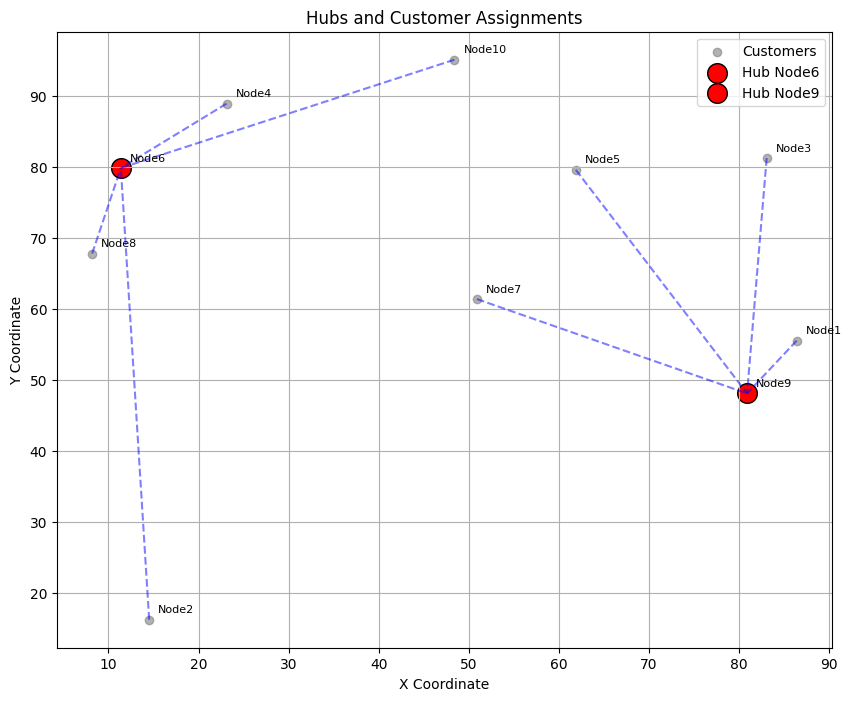

In [4]:
visualize_hub_assignment_solution(coordinates, best_hub_selection, best_solution)

In [5]:

y = best_hub_selection
z = best_solution

# Map node indices to node names
node_indices = {i: nodes[i] for i in range(num_nodes)}
node_names_to_indices = {nodes[i]: i for i in range(num_nodes)}

# Hubs and Customers
hubs = [i for i, is_hub in enumerate(best_hub_selection) if is_hub]  # Indices of hubs
customers = [i for i in range(num_nodes) if not best_hub_selection[i]]  # Indices of customers

# Demands
random.seed(42)
demands = [0] * num_nodes
for i in customers:
    demands[i] = random.randint(1, 10)

# Vehicle Capacity
vehicle_capacity = 15

# Customer Assignments
customer_assignments = {i: z[i] for i in customers}



Generation 0: Best Cost = 330.5599545583536
Generation 1: Best Cost = 330.0880612057715
Generation 3: Best Cost = 319.6240264481826

Best Solution:
Hub Node6:
  Route: ['Node6', 'Node10', 'Node4', 'Node6'], Load: 13
  Route: ['Node6', 'Node2', 'Node8', 'Node6'], Load: 3
Hub Node9:
  Route: ['Node9', 'Node7', 'Node5', 'Node3', 'Node1', 'Node9'], Load: 14
Best Total Cost: 319.6240264481826


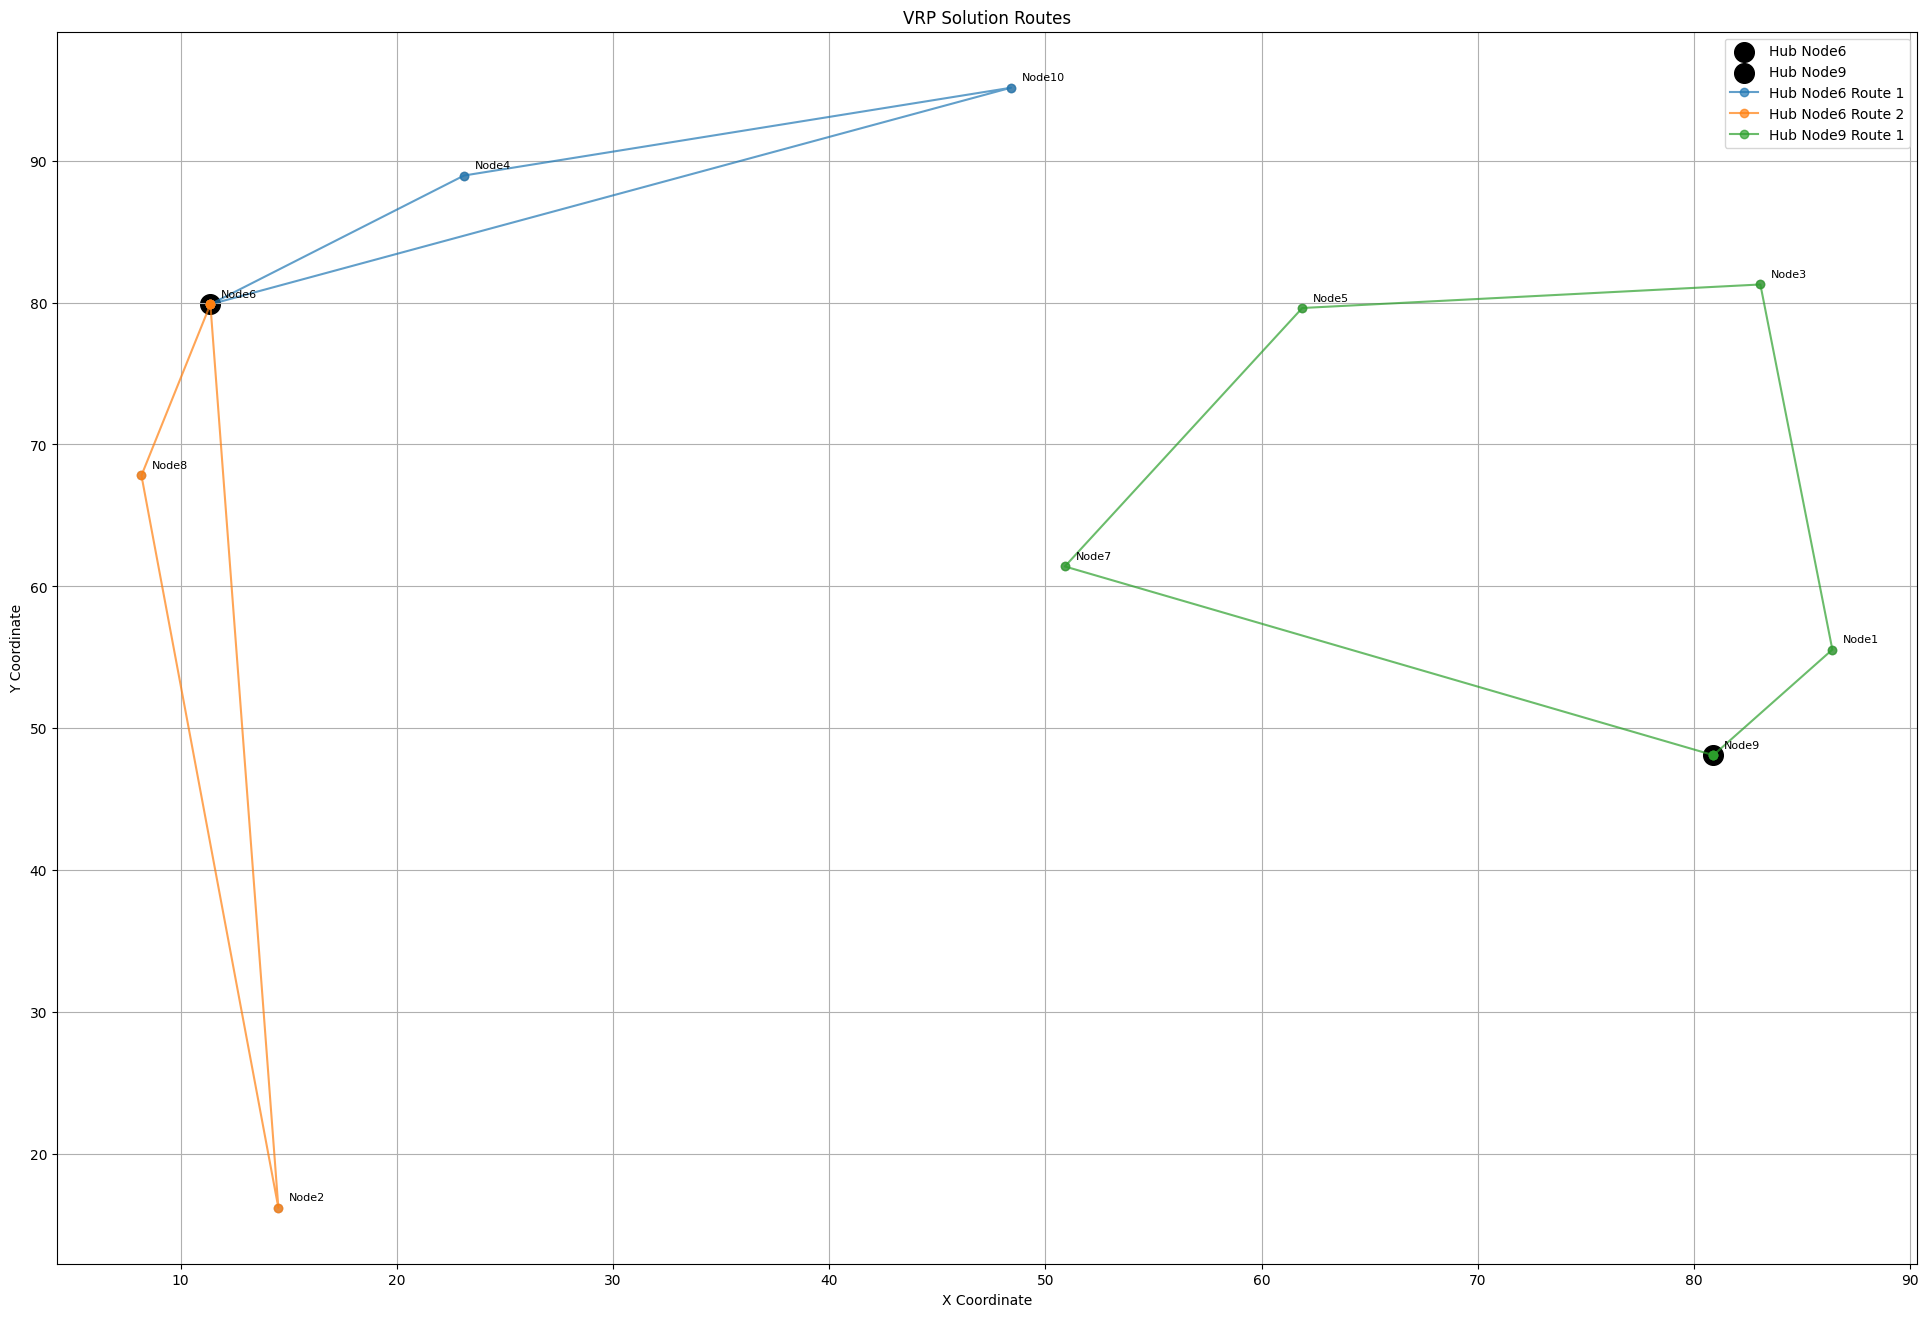

In [6]:
index_to_node = {i: nodes[i] for i in range(num_nodes)}
# Generate time windows for customers
time_windows = {i: (random.randint(0, 20), random.randint(21, 40)) for i in customers}

# Fixed costs for hubs
#fixed_costs = {h: random.randint(100, 300) for h in hubs}

# Vehicle distance limits (for this example, unlimited)
vehicle_distance_limit = float('inf')
vehicle_speed =15
max_hubs_to_open = 2
ga_vrp = GeneticAlgorithmVRP(
    distance_matrix=distance_matrix,
    demands=demands,
    vehicle_capacity=vehicle_capacity,
    customer_assignments=customer_assignments,
    hubs=hubs,
    customers=customers,
    time_windows=time_windows,
    #fixed_costs=fixed_costs,
    vehicle_speed=vehicle_speed,
    max_hubs_to_open=max_hubs_to_open
)

best_solution_vrp, best_cost_vrp = ga_vrp.run()
index_to_node = {i: nodes[i] for i in range(num_nodes)}
print("\nBest Solution:")
for hub in hubs:
    print(f"Hub {index_to_node[hub]}:")
    for route in best_solution_vrp[hub]:
        route_nodes = [index_to_node[c] for c in route]
        route_load = sum(demands[c] for c in route)
        print(f"  Route: {route_nodes}, Load: {route_load}")
print(f"Best Total Cost: {best_cost_vrp}")

visualize_vrp_solution(coordinates, best_solution_vrp, hubs, index_to_node)


In [7]:
import random
import numpy as np

# **Step 1: Data Generation**

# Define parameters
num_customers = 12
num_hubs = 2
vehicle_capacity = 15
vehicle_speed = 40  # in distance units per hour
max_hubs_to_open = 2
max_generations = 100

# Generate random demands
random.seed(42)




# **Step 3: Run Heuristic**


